# FORCLOSED

In [1]:
import pandas as pd
df=pd.read_csv("TRAIN_ver04.csv")

print(df.columns)
print(df.dtypes)

Index(['LID', 'CHNL', 'SELLER', 'ORIGRATE', 'ORIGUPB', 'ORIGTERM', 'LOANAGE',
       'REMMNTHS', 'ADJRMTHS', 'OLTV', 'NUMBO', 'DTI', 'CSCOREB', 'FIRSTFLAG',
       'PURPOSE', 'PROP', 'NO_UNITS', 'OCCSTAT', 'STATE', 'DLQSTATUS',
       'RELMORTGIND', 'ACTPER_MO', 'GAP', 'TIMGAP1', 'TIMGAP2', 'NMONTHS',
       'FORCLOSED'],
      dtype='object')
LID              int64
CHNL            object
SELLER          object
ORIGRATE       float64
ORIGUPB        float64
ORIGTERM         int64
LOANAGE          int64
REMMNTHS         int64
ADJRMTHS         int64
OLTV           float64
NUMBO          float64
DTI            float64
CSCOREB        float64
FIRSTFLAG       object
PURPOSE         object
PROP            object
NO_UNITS         int64
OCCSTAT         object
STATE           object
DLQSTATUS        int64
RELMORTGIND     object
ACTPER_MO        int64
GAP              int64
TIMGAP1          int64
TIMGAP2          int64
NMONTHS          int64
FORCLOSED         bool
dtype: object


## Step 1: Reduce the dimension.

## PCA

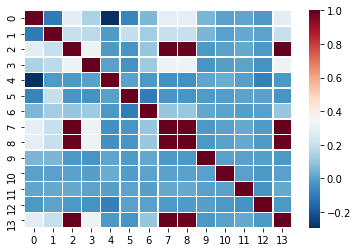

In [2]:
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns

PreVar=['ORIGRATE', 'ORIGUPB', 'ORIGTERM','OLTV','LOANAGE','NUMBO','DTI','REMMNTHS',
        'ADJRMTHS','NO_UNITS','DLQSTATUS','ACTPER_MO','TIMGAP1','TIMGAP2']
df_pre=df.loc[:,PreVar].values
sns.heatmap(np.corrcoef(df_pre.T),linewidths= 0.3,cmap= "RdBu_r")

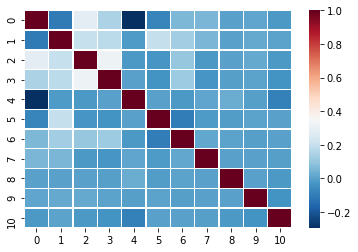

In [3]:
PreVar=['ORIGRATE', 'ORIGUPB', 'ORIGTERM','OLTV','LOANAGE','NUMBO','DTI','NO_UNITS','DLQSTATUS','ACTPER_MO','TIMGAP1']
df_pre=df.loc[:,PreVar].values
sns.heatmap(np.corrcoef(df_pre.T),linewidths= 0.3,cmap= "RdBu_r")

In [4]:
CatVar=['SELLER','CHNL', 'FIRSTFLAG', 'PURPOSE', 'PROP', 'NO_UNITS','OCCSTAT', 'STATE',  
          'RELMORTGIND', 'GAP']

In [5]:
for i in CatVar:
    print(i) 
    print(df[i].value_counts())

SELLER
Other                                        45827
Jpmorgan Chase Bank, Na                      36062
Bank Of America, N.A.                        22263
Citimortgage, Inc.                           10002
Jpmorgan Chase Bank, National Association     9649
Suntrust Mortgage Inc.                        9176
Bishops Gate Residential Mortgage Trust       7474
Gmac Mortgage, Llc                            6583
First Tennessee Bank National Association     6076
Flagstar Bank, Fsb                            5802
Wells Fargo Bank, N.A.                        5419
Amtrust Bank                                  4742
Netbank Funding Services                      4483
Regions Bank                                  3567
Jp Morgan Chase Bank, Na                      3369
Usaa Federal Savings Bank                     2191
Harwood Street Funding I, Llc                 1911
Rbc Mortgage Company                          1738
Pnc Bank, N.A.                                 701
Washtenaw Mortgage Compa

In [6]:
df["FORCLOSED"].value_counts()

False    186606
True       2136
Name: FORCLOSED, dtype: int64

In [7]:
df_seller=df[["SELLER","FORCLOSED"]].groupby("SELLER")
df_seller.mean() 

,FORCLOSED
SELLER,
Amtrust Bank,0.008435
"Bank Of America, N.A.",0.011679
Bishops Gate Residential Mortgage Trust,0.013380
"Citimortgage, Inc.",0.012997
"Downey Savings And Loan Association, F.A.",0.007246
First Tennessee Bank National Association,0.008394
"Flagstar Bank, Fsb",0.014305
"Gmac Mortgage, Llc",0.017014
"Harwood Street Funding I, Llc",0.012559


In [8]:
for i in CatVar:
    df[i]=df[i].apply(lambda x: str(x))
    dummies=pd.get_dummies(df[i],drop_first=True)
    PreVar+=list(dummies.columns)
    df=pd.concat([df,dummies],axis=1)

Set=df.loc[:,PreVar].values
Labeles=df.loc[:,'FORCLOSED'].values
N=df.shape[0]

def transDim(tSet,dim):
    pca=PCA(n_components=dim)
    pca.fit(tSet)
    return pca.transform(tSet)

In [9]:
Set=df.loc[:,PreVar].values
pca=PCA()
pca.fit(Set)
# print(pca.components_)  
print(np.cumsum(pca.explained_variance_ratio_ ,axis=0))

[0.99999854 0.99999988 0.99999996 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         

## Step 2: Try several methods from the lectures.

## Logistic Regression

In [10]:
PreVar=['ORIGRATE', 'ORIGUPB', 'ORIGTERM','OLTV','LOANAGE','NUMBO','DTI','NO_UNITS','DLQSTATUS','ACTPER_MO','TIMGAP1']
CatVar=['SELLER','CHNL', 'FIRSTFLAG', 'PURPOSE', 'PROP', 'NO_UNITS','OCCSTAT', 'STATE',  
          'RELMORTGIND', 'GAP']
for i in CatVar:
    df[i]=df[i].apply(lambda x: str(x))
    dummies=pd.get_dummies(df[i],drop_first=True)
    PreVar+=list(dummies.columns)
    df=pd.concat([df,dummies],axis=1)
print(len(PreVar))

Set=df.loc[:,PreVar].values
# Set=transDim(Set,'mle')
dim=3
Set=transDim(Set,dim) #decrease the dimension to 10
data=pd.DataFrame(Set)
nameList=[('x'+str(i)) for i in range(dim)]
data.columns=nameList
data['y']=df.loc[:,'FORCLOSED'].apply(lambda x: int(x))
data.head()

102


,x0,x1,x2,y
0,-21335.515333,-33.400628,29.334866,0
1,-21335.556458,143.608658,-15.461069,0
2,104664.439910,174.102870,-11.831146,0
3,21664.485097,-25.151173,3.266569,0
4,-75335.512127,-48.754496,-1.560199,0


In [11]:
from sklearn.linear_model import LogisticRegression
import patsy as ps
from sklearn.metrics import confusion_matrix

def Logit(formula,dftrain,dftest,threshold=0.5):
    Ytrain,Xtrain=ps.dmatrices(formula,dftrain)
    Ytest,Xtest=ps.dmatrices(formula,dftest)
    Ytrain=np.reshape(Ytrain, (Ytrain.shape[0],)) # logistic regression wants shape as (N,) rather than (N,1)
    Ytest=np.reshape(Ytest,(Ytest.shape[0],))
    clf = LogisticRegression().fit(Xtrain,Ytrain)
    Ypred_prob=clf.predict_proba(Xtest)
    Ypred=pd.Series(Ypred_prob[:,0]<threshold)
    Ytest=pd.Series(Ytest)

    TN=sum((Ytest==0)&(Ypred==0))
    FP=sum((Ytest==0)&(Ypred==1))
    TP=sum((Ytest==1)&(Ypred==1))
    FN=sum((Ytest==1)&(Ypred==0))

    FPR = FP/(FP+TN)
    TPR = TP/(TP+FN)
    return FPR,TPR

In [12]:
N=data.shape[0]
I=np.random.permutation(range(N))
Itest=I[0:int(N/3)]
Itrain=I[int(N/3):N]
dftrain=data.iloc[Itrain]
dftest=data.iloc[Itest]
print(dftrain.shape,dftest.shape)
print(dftrain.columns)

(125828, 4) (62914, 4)
Index(['x0', 'x1', 'x2', 'y'], dtype='object')


In [13]:
formula="y~"+"+".join(nameList)

threshold=np.linspace(0.01,0.99,99)
bestThreshold=0
FPR0=0
TPR0=0
for i in threshold:
    FPR,TPR=Logit(formula,dftrain,dftest,i)
    if np.abs(FPR-0.5)<np.abs(FPR0-0.5):
        FPR0=FPR
        TPR0=TPR
        bestThreshold=i     

In [14]:
print("threshold = {:5.3f}".format(bestThreshold))
print("false positive rate = {:5.3f}".format(FPR0))
print("true positive rate = {:5.3f}".format(TPR0))  

## It takes several minutes to get the best result:
threshold = 0.99
false positive rate = 0.48
true positive rate = 0.87

In [15]:
from sklearn import metrics
from matplotlib import pyplot as plt
threshold=bestThreshold
formula="y~"+"+".join(nameList)
Ytrain,Xtrain=ps.dmatrices(formula,dftrain)
Ytest,Xtest=ps.dmatrices(formula,dftest)
Ytrain=np.reshape(Ytrain, (Ytrain.shape[0],)) 
Ytest=np.reshape(Ytest,(Ytest.shape[0],))
clf = LogisticRegression().fit(Xtrain,Ytrain)
Ypred_prob=clf.predict_proba(Xtest)
Ypred=pd.Series(Ypred_prob[:,0]<threshold)
Ytest=pd.Series(Ytest)

ActualNeg=sum(Ytest==0)
ActualPos=sum(Ytest==1)

TN=sum((Ytest==0)&(Ypred==0))
FP=sum((Ytest==0)&(Ypred==1))
TP=sum((Ytest==1)&(Ypred==1))
FN=sum((Ytest==1)&(Ypred==0))

d=pd.DataFrame(np.matrix([[TN,FP],[FN,TP]]))
print("confusion matrix")
print(d)
FPR=FP/(FP+TN)
TPR=TP/(TP+FN)
print("\n")

print("false positive rate = {:5.3f}".format(FPR))
print("true positive rate = {:5.3f}".format(TPR))
print(TP)
fpr, tpr, thresholds = metrics.roc_curve(list(Ytest), list(Ypred_prob[:,1]))
lineStart,lineEnd=0,1

plt.plot(fpr,tpr)
plt.title('ROC Curve (LR)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
fig=plt.gcf()
fig.savefig('./auc1.eps')
plt.show()


In [16]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Ytest,Ypred_prob[:,1])

NameError: name 'Ytest' is not defined

## Decision Tree

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=25,min_samples_leaf=25)
clf = clf.fit(Xtrain,Ytrain)

ptrain=clf.predict_proba(Xtrain)[:,1]
ptest=clf.predict_proba(Xtest)[:,1]
Ypred_prob=clf.predict_proba(Xtest)
Ypred=pd.Series(Ypred_prob[:,0]<threshold)

fpr1, tpr1, thresholds = metrics.roc_curve(list(Ytrain), list(ptrain))
fpr2, tpr2, thresholds = metrics.roc_curve(list(Ytest), list(ptest))

lineStart,lineEnd=0,1
plt.plot(fpr1,tpr1,color="b")
plt.plot(fpr2,tpr2,color="g")
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
fig=plt.gcf()
fig.savefig('./auc2.eps')
plt.show()



In [ ]:
roc_auc_score(Ytest,Ypred_prob[:,1])

In [ ]:
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=10, shuffle=True) #10-fold
X=data[nameList].values # features
C=data["y"].values # labels
clf_score=[]
for k, (train, test) in enumerate(k_fold.split(data.copy())):
    clf_pred=clf.fit(X[train],C[train]).predict(X[test])
    clf_score.append((clf_pred == C[test]).sum() / float(test.size))
print("Decision Tree",clf_score)

## The ROC curve of the test data (green) shows that this method is not so good.  

## Ridge Regression

In [ ]:
from sklearn import linear_model
N=df.shape[0]
perm=np.random.permutation(range(N))
Itrain1=perm[0:int(N/3)]
Itrain2=perm[int(N/3):int(2*N/3)]
Itest=perm[int(2*N/3):N]
Xtrain1=df.loc[Itrain1,PreVar].values
Ytrain1=df['FORCLOSED'].loc[Itrain1].values
Xtrain2=df.loc[Itrain2,PreVar].values
Ytrain2=df['FORCLOSED'].loc[Itrain2].values
Xtest=df.loc[Itest,PreVar].values
Ytest=df['FORCLOSED'].loc[Itest].values

MAD=[]
alpha_range=np.linspace(1.,200.,100)
for a in alpha_range:
    reg = linear_model.Ridge(alpha=a)
    reg.fit(Xtrain1,Ytrain1)
    Ypred2=reg.predict(Xtrain2)
    mad=sum(abs(Ypred2-Ytrain2))/len(Ypred2)
    MAD.append(mad)

%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(alpha_range,MAD,s=2)
plt.title('MAD vs. alpha')
plt.xlabel('alpha')
plt.ylabel('MAD')
plt.show()

J=pd.Series(range(len(MAD)))[MAD==min(MAD)]
alpha_range[J][0]

reg3 = linear_model.Ridge(alpha=100)
reg3.fit(Xtrain2,Ytrain2)
Ypred=reg3.predict(Xtrain2)

sum(abs(Ypred-Ytrain2))/len(Ypred)

# Lasso Regression

In [17]:
PreVar

['ORIGRATE',
 'ORIGUPB',
 'ORIGTERM',
 'OLTV',
 'LOANAGE',
 'NUMBO',
 'DTI',
 'NO_UNITS',
 'DLQSTATUS',
 'ACTPER_MO',
 'TIMGAP1',
 'Bank Of America, N.A.',
 'Bishops Gate Residential Mortgage Trust',
 'Citimortgage, Inc.',
 'Downey Savings And Loan Association, F.A.',
 'First Tennessee Bank National Association',
 'Flagstar Bank, Fsb',
 'Gmac Mortgage, Llc',
 'Harwood Street Funding I, Llc',
 'Jp Morgan Chase Bank, Na',
 'Jpmorgan Chase Bank, Na',
 'Jpmorgan Chase Bank, National Association',
 'Netbank Funding Services',
 'Old Kent Mortgage Company',
 'Other',
 'Pnc Bank, N.A.',
 'Rbc Mortgage Company',
 'Regions Bank',
 'Suntrust Mortgage Inc.',
 'The Huntington National Bank',
 'Usaa Federal Savings Bank',
 'Washtenaw Mortgage Company',
 'Wells Fargo Bank, N.A.',
 'C',
 'R',
 'Y',
 'P',
 'R',
 'U',
 'CP',
 'MH',
 'PU',
 'SF',
 '2',
 '3',
 '4',
 'P',
 'S',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA

In [27]:
from sklearn import model_selection
from sklearn.linear_model import Lasso,LassoCV
from sklearn.metrics import mean_squared_error
def lasso(data,PreVar):
    x_train,x_test,y_train,y_test=model_selection.train_test_split(data[PreVar],data["FORCLOSED"],
                                                               test_size=0.2,random_state=1234)
    Lambdas=np.logspace(-5,2,200)
 
    lasso_cv=LassoCV(alphas=Lambdas,normalize=True,cv=10,max_iter=10000)
    lasso_cv.fit(x_train,y_train)

  
    lasso=Lasso(alpha=lasso_cv.alpha_,normalize=True,max_iter=10000)
    lasso.fit(x_train,y_train)

    lasso_pred=lasso.predict(x_test)
    MSE=mean_squared_error(y_test,lasso_pred)
    print(MSE)
    
    return(pd.Series(index=['Intercept']+x_train.columns.tolist(),
                data=[lasso.intercept_]+lasso.coef_.tolist()))
    
intercept=lasso(df,PreVar)

0.01130627445852089


In [78]:
a1 = pd.DataFrame(data=intercept.index, columns=['variable'])
a2 = pd.DataFrame(data=intercept.values, columns=['coef'])
a = pd.merge(a1, a2, left_index=True, right_index=True)
a[a.loc[:,"coef"]>1e-10]

,variable,coef
1,ORIGRATE,0.005033
4,OLTV,0.000054
78,MH,0.011868


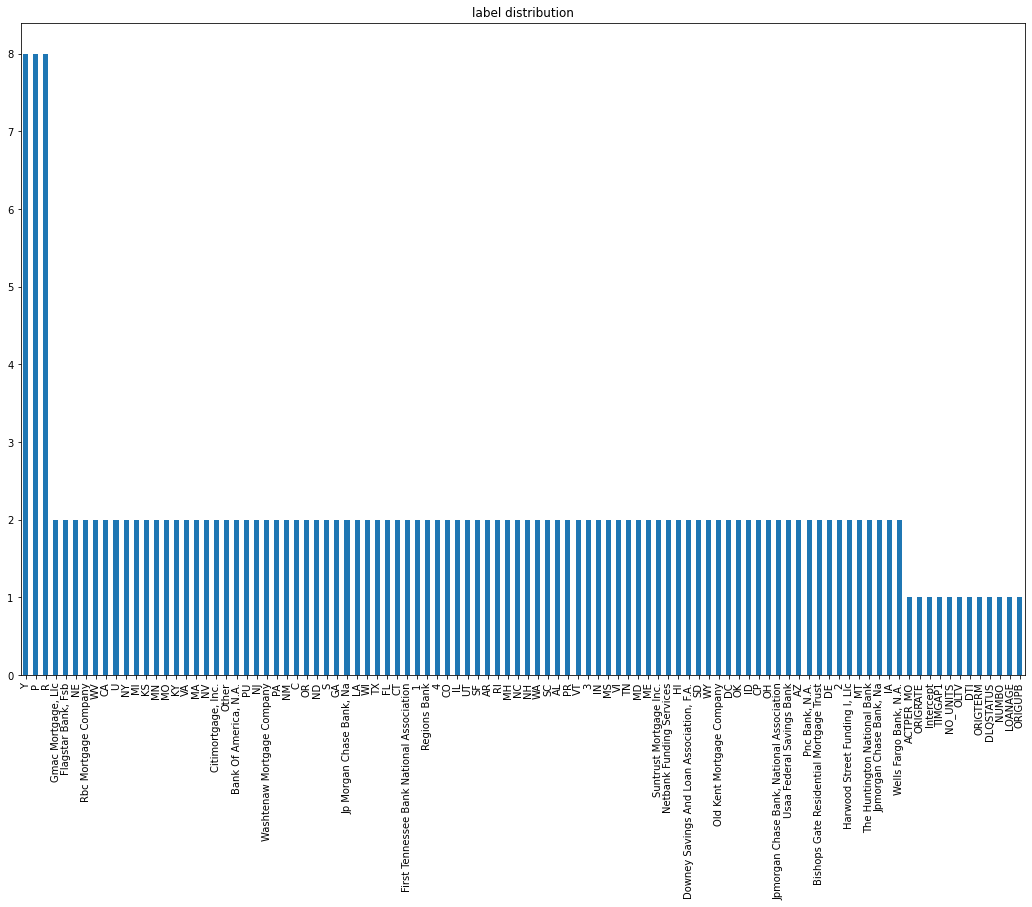

In [94]:
label_dis = a.variable.value_counts()
ax = label_dis.plot(title='label distribution',kind='bar',figsize=(18,12))
fig = ax.get_figure()
fig.savefig('label_distribution.eps')